In [1]:
# 1 Завантажити дані, вивести назви колонок і розмір датасета
# 2 Опрацювати пропуски (по можливості заповнити їх або видалити)

import pandas as pd

df = pd.read_csv("diabetes.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: >

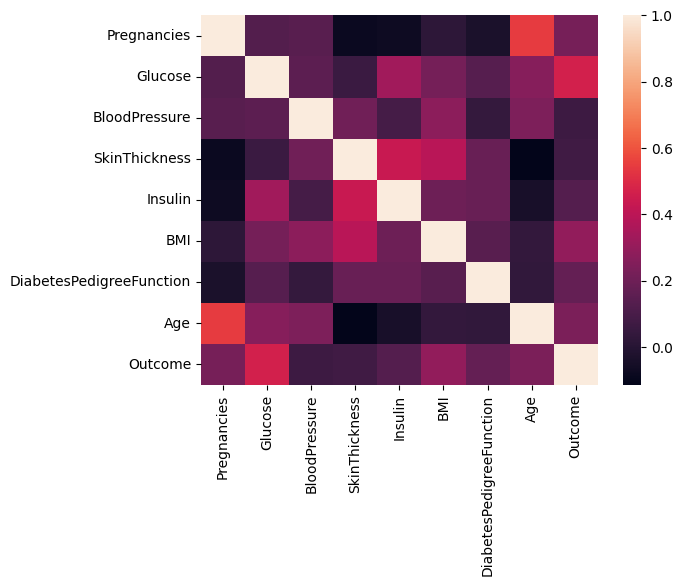

In [2]:
# 3.1 Візуалізувати дані: побудувати heatmap

import seaborn as sns

sns.heatmap(df.corr())

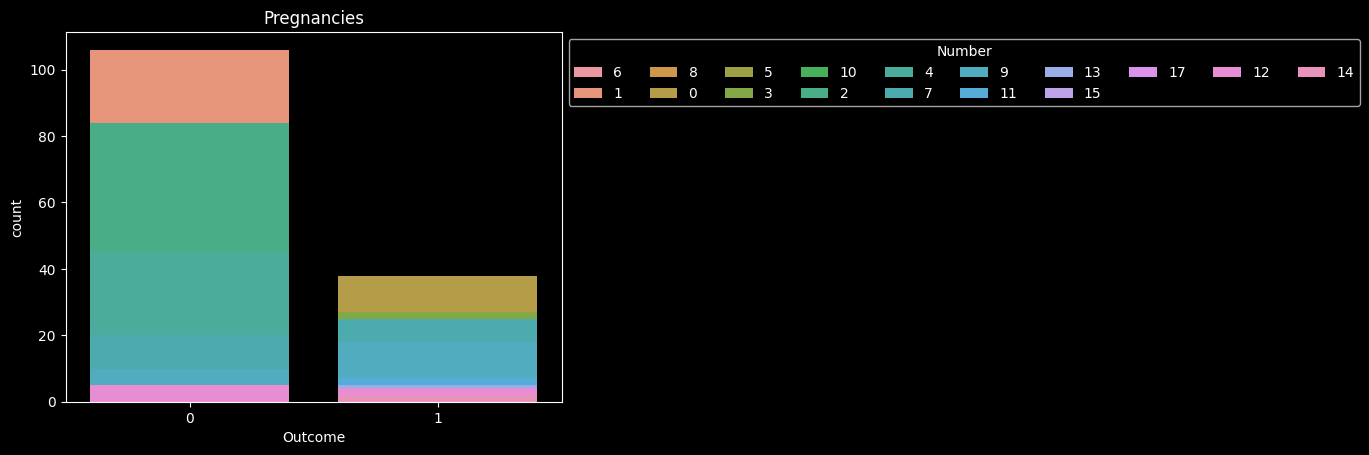

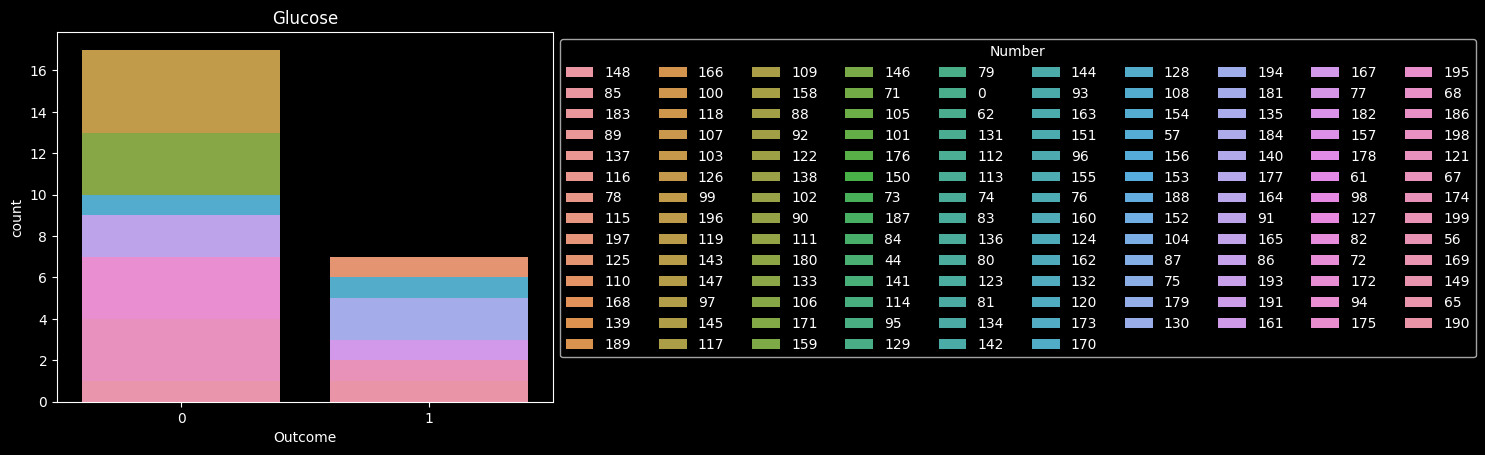

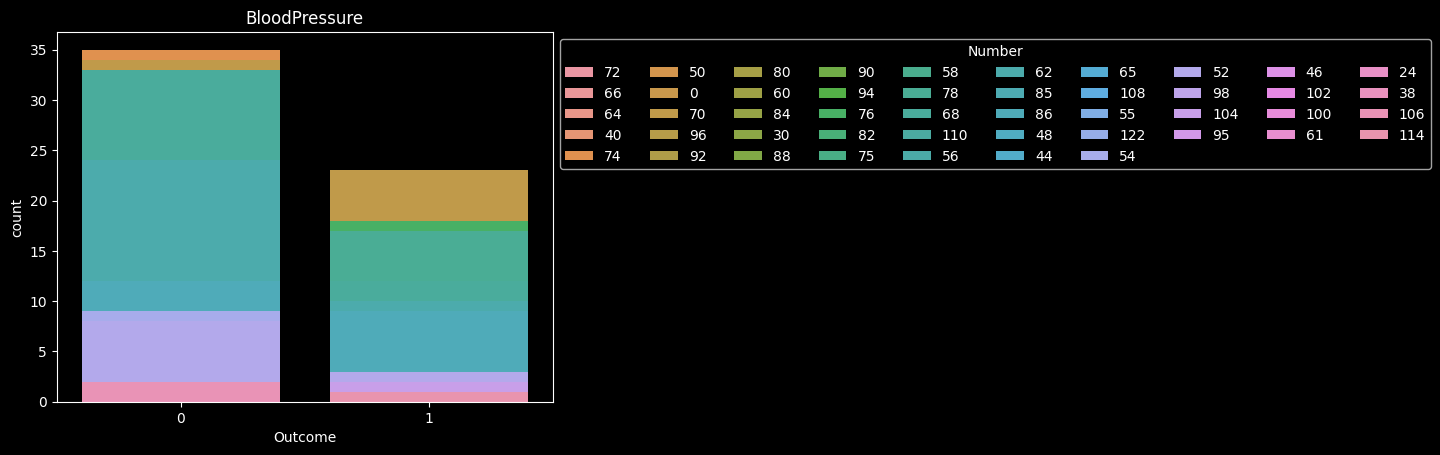

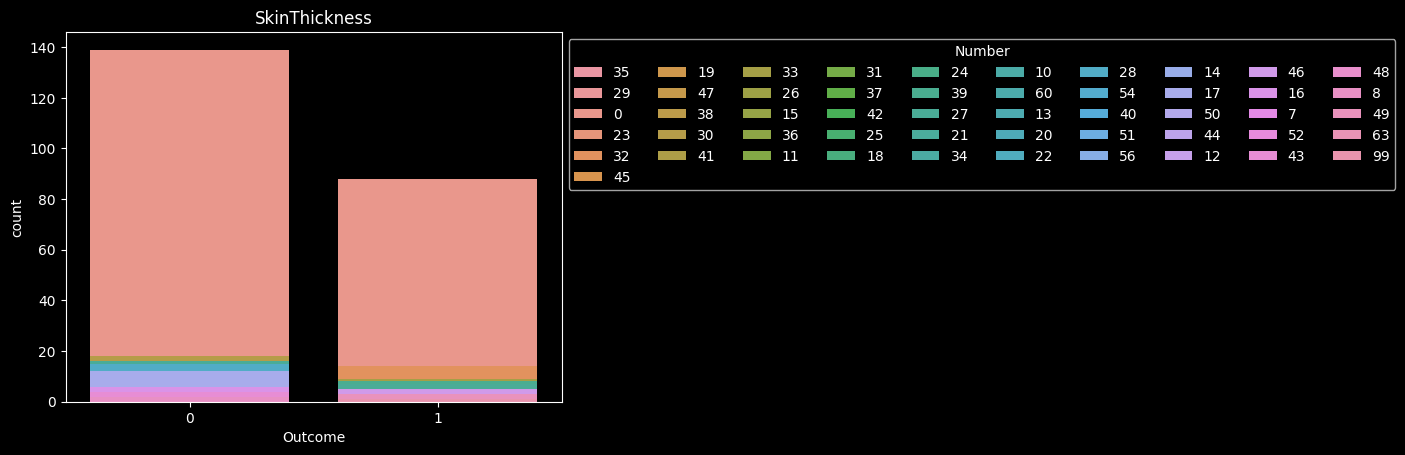

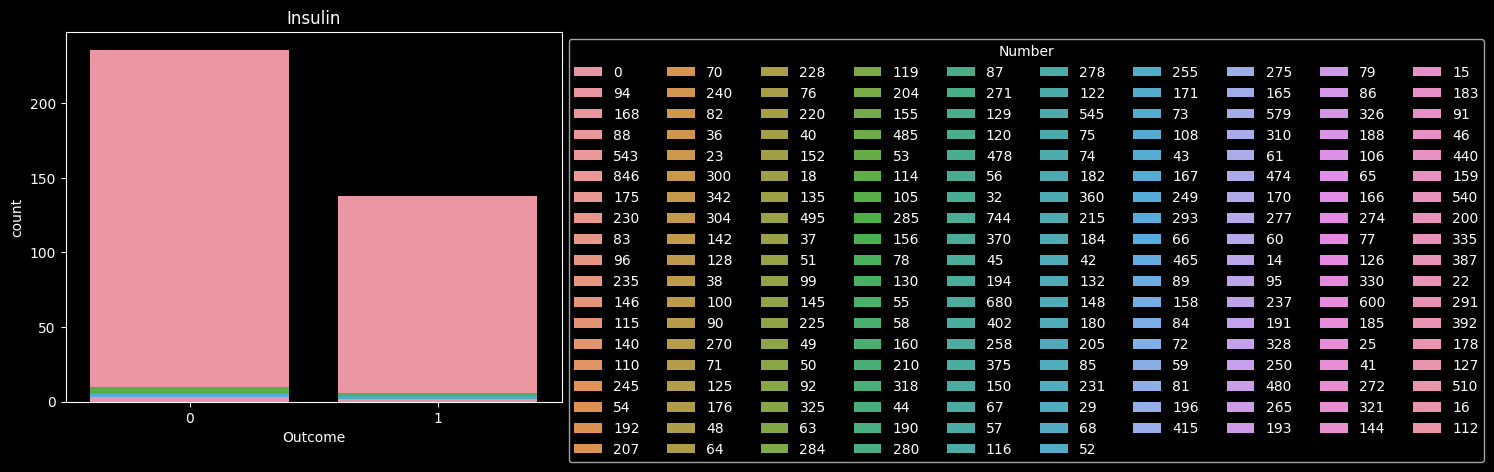

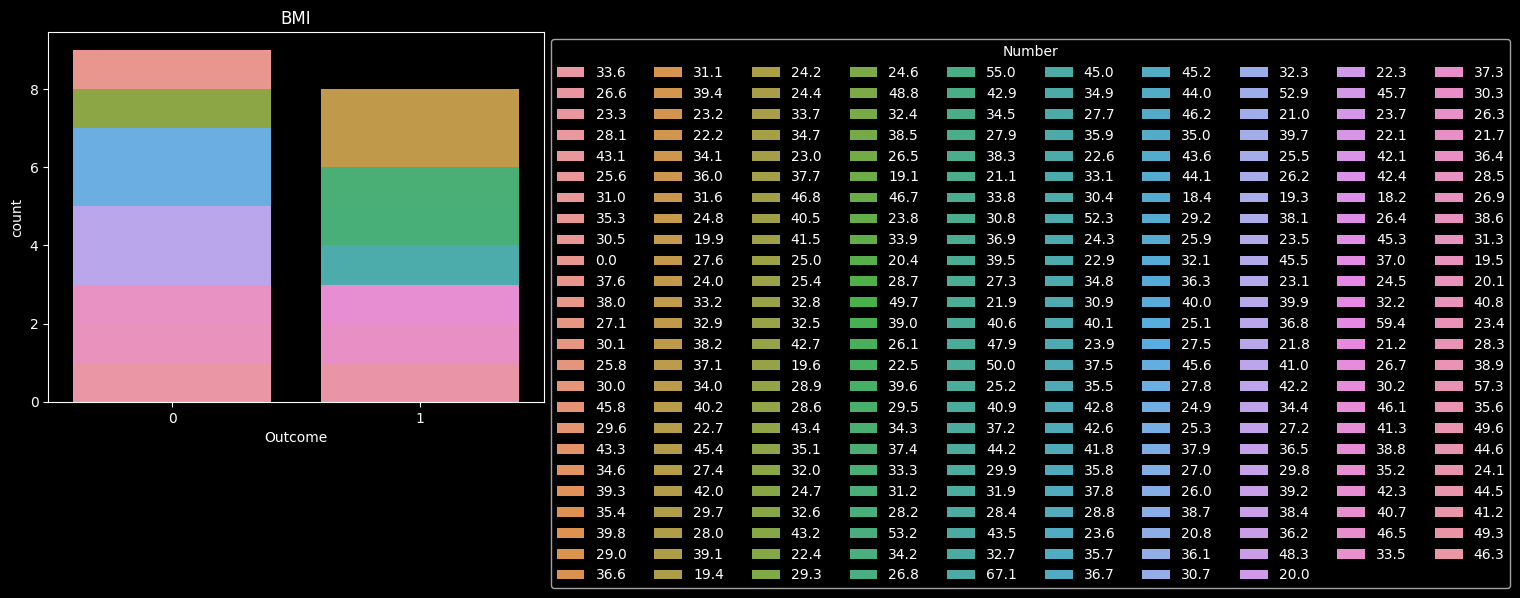

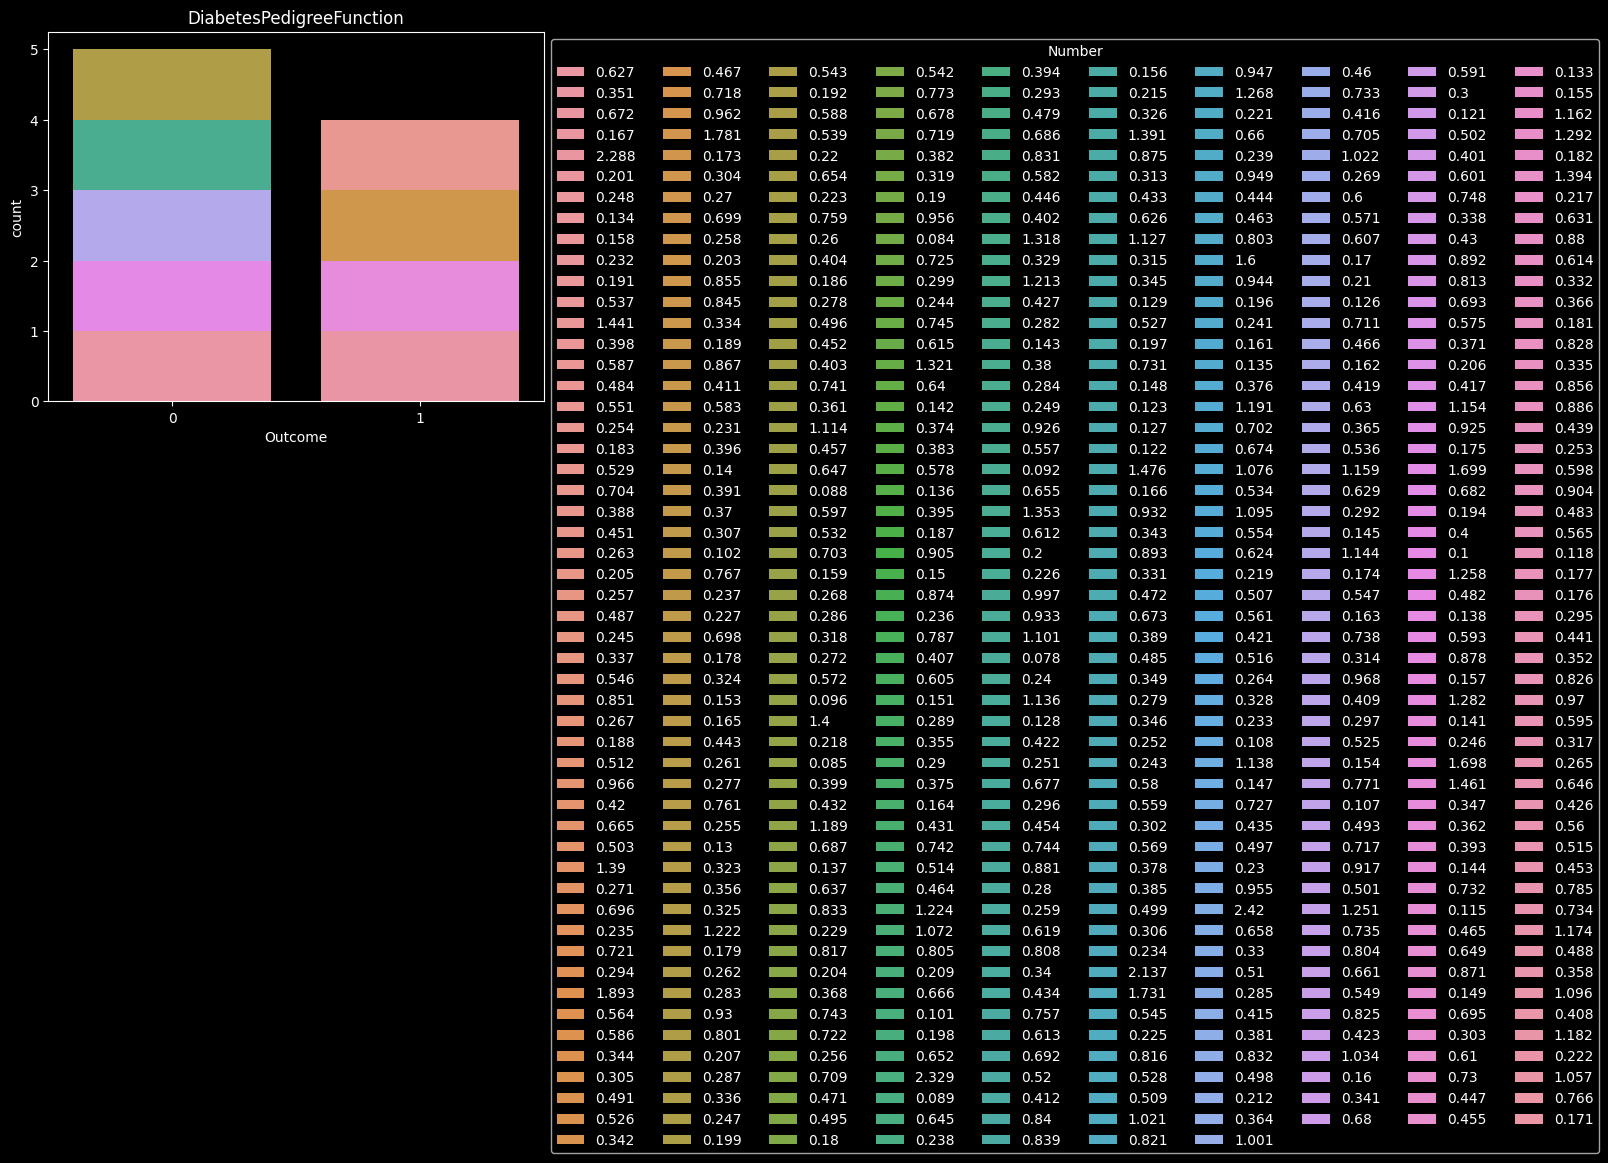

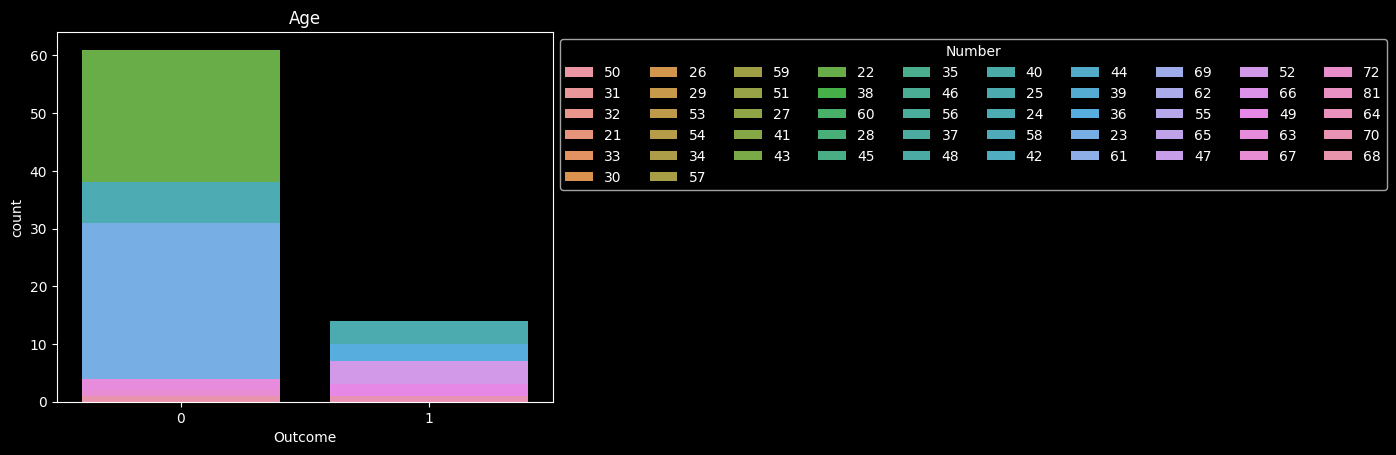

In [3]:
# 3.2 побудувати гістограми розподілу ознак і boxplot-и ознак відносно цільової змінної

import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df_copy = df.copy()
plt.style.use('dark_background')
for i in list(df)[:-1]:
    df_copy[i] = df[i].astype(str)
    sns.countplot(x="Outcome", hue=i, data=df_copy, dodge=False).set(title=i)
    plt.legend(title = 'Number', bbox_to_anchor = (1, 1), ncols=10)
    plt.show()

del df_copy

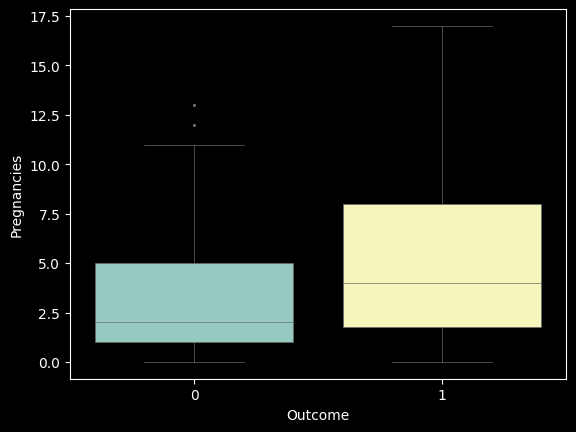

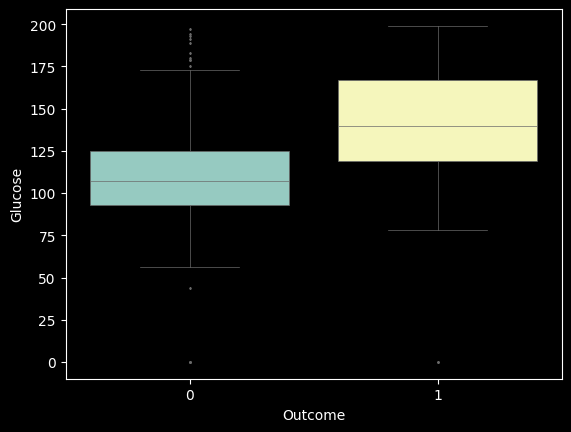

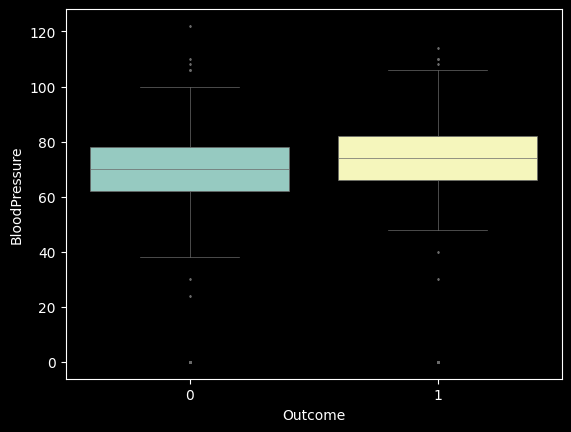

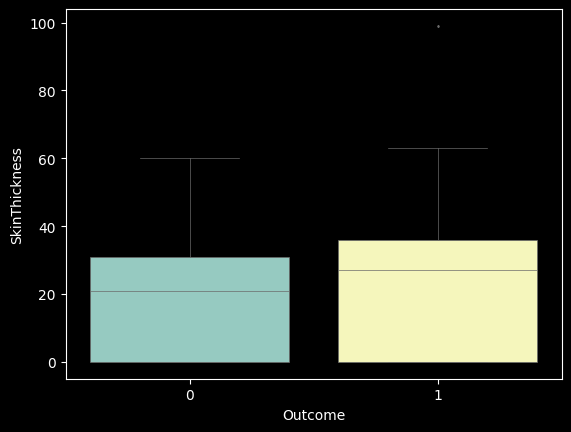

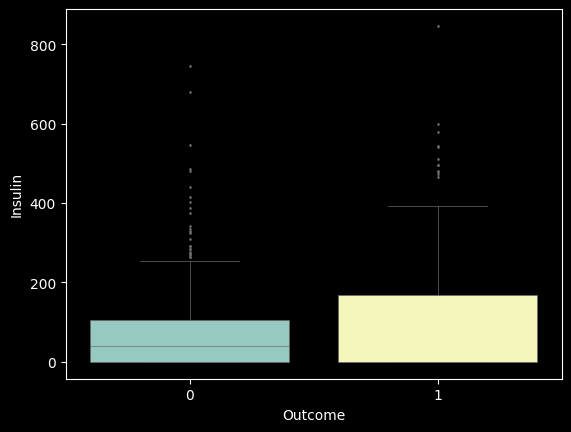

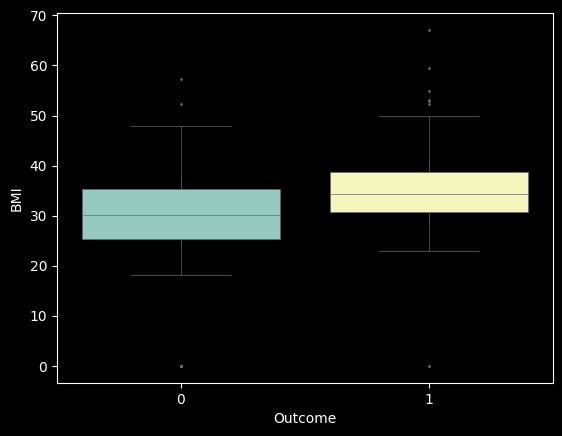

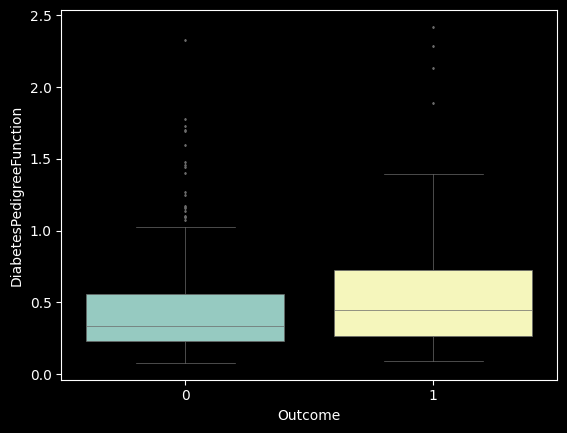

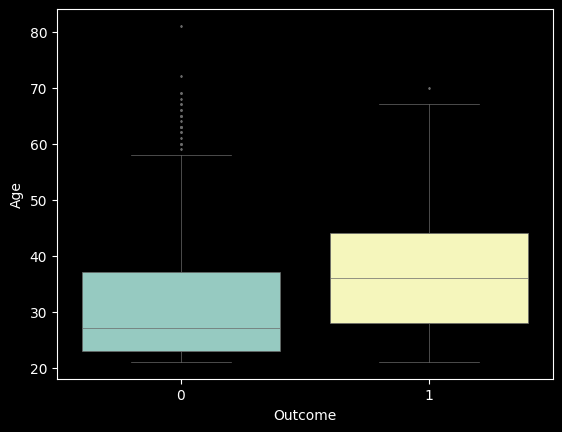

In [4]:
for i in list(df)[:-1]:
    sns.boxplot(x="Outcome", y=i, data=df, linewidth = 0.5, fliersize = 1)
    plt.show()

#sns.boxplot(x="Outcome", y="Glucose", data=df, linewidth = 0.5, fliersize = 1)

In [5]:
# 4 Нормалізувати дані

from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
sc_df = pd.DataFrame(scaler.fit_transform(df), columns=list(df))
#sc_df.head()
sc_df.tail()
#sc_df.info()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0.0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0.0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0.0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1.0
767,0.058824,0.467337,0.573770,0.313131,0.000000,0.453055,0.101196,0.033333,0.0


In [6]:
# 5 Провести навчання класифікаторів

from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test) 

In [7]:
# 5.1 knn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn = KNeighborsClassifier()
knn.fit(scaled_X_train, y_train)

y_pred = knn.predict(scaled_X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.74      0.78       160
           1       0.51      0.61      0.55        71

    accuracy                           0.70       231
   macro avg       0.66      0.67      0.67       231
weighted avg       0.72      0.70      0.71       231



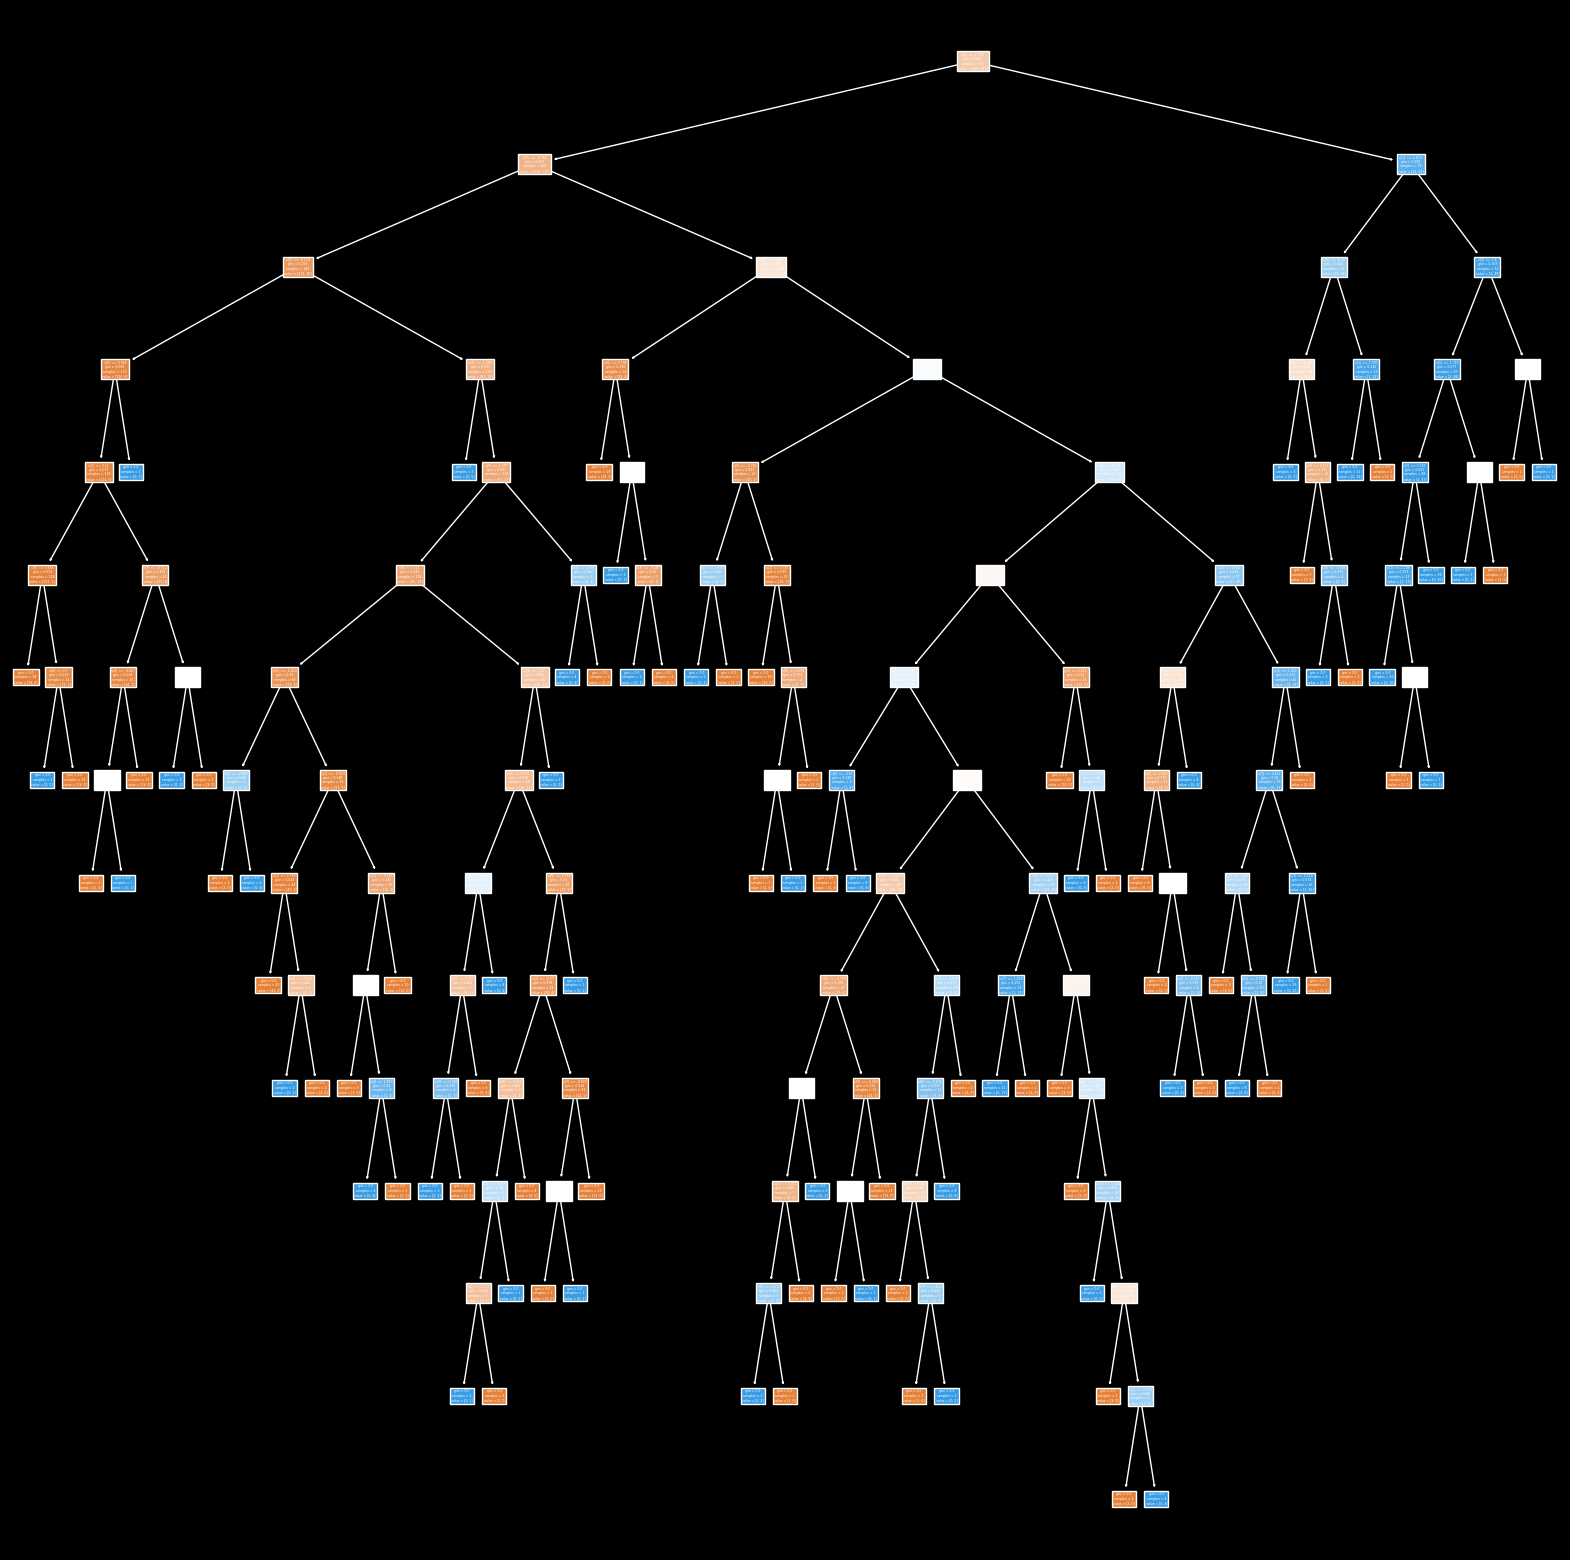

              precision    recall  f1-score   support

           0       0.80      0.75      0.77       160
           1       0.51      0.58      0.54        71

    accuracy                           0.70       231
   macro avg       0.65      0.66      0.66       231
weighted avg       0.71      0.70      0.70       231



In [16]:
# 5.2 decision tree

from sklearn.tree import DecisionTreeClassifier, plot_tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(scaled_X_train, y_train)
y_pred = decision_tree.predict(scaled_X_test)

plt.figure(figsize=(20,20))
plot_tree(decision_tree, filled = True)#, max_depth=3)
plt.show()
print(classification_report(y_test,y_pred))

In [9]:
# 5.3 svm

from sklearn import svm

svm_alg = svm.SVC()
svm_alg.fit(scaled_X_train, y_train)
y_pred = svm_alg.predict(scaled_X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       160
           1       0.64      0.66      0.65        71

    accuracy                           0.78       231
   macro avg       0.74      0.75      0.74       231
weighted avg       0.78      0.78      0.78       231



In [10]:
# 5.4 random forest

from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier()
rand_forest.fit(scaled_X_train, y_train)
y_pred = rand_forest.predict(scaled_X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       160
           1       0.66      0.70      0.68        71

    accuracy                           0.80       231
   macro avg       0.76      0.77      0.77       231
weighted avg       0.80      0.80      0.80       231



In [11]:
# 5.5 adaboost

from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier()
adaboost.fit(scaled_X_train, y_train)
y_pred = adaboost.predict(scaled_X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       160
           1       0.57      0.63      0.60        71

    accuracy                           0.74       231
   macro avg       0.70      0.71      0.70       231
weighted avg       0.75      0.74      0.74       231



In [12]:
# 6 Підібрати оптимальні параметри
# 6.1 knn

from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = []
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(scaled_X_train, y_train)
    y_pred = knn.predict(scaled_X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

best_k = accuracy.index(max(accuracy))+1

print(f"the highest accuracy is {accuracy[best_k - 1]} at K = {best_k}")

knn = KNeighborsClassifier(n_neighbors = accuracy.index(max(accuracy))+1)
knn.fit(scaled_X_train, y_train)
y_pred = knn.predict(scaled_X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

the highest accuracy is 0.7748917748917749 at K = 32
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       160
           1       0.66      0.55      0.60        71

    accuracy                           0.77       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.77      0.77      0.77       231

[[140  20]
 [ 32  39]]


In [13]:
# 6.2 svm

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV((svm.SVC()), param_grid)
grid.fit(scaled_X_train, y_train)
print(grid.best_params_)

grid = svm.SVC(C=10, gamma=0.1)
grid.fit(scaled_X_train, y_train)
y_pred = grid.predict(scaled_X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       160
           1       0.61      0.68      0.64        71

    accuracy                           0.77       231
   macro avg       0.73      0.74      0.73       231
weighted avg       0.77      0.77      0.77       231

[[129  31]
 [ 23  48]]
